   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

결

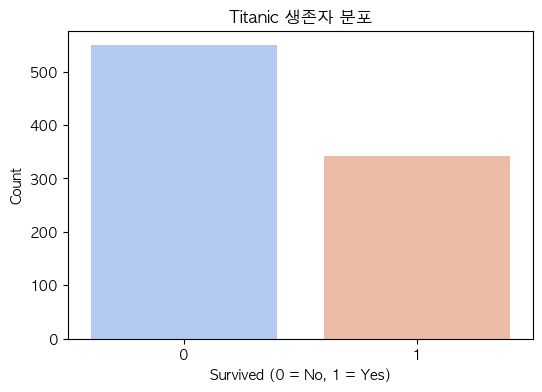

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.font_manager as fm
plt.rc('font', family='AppleGothic')

# 웹에서 데이터 불러오기
file_url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/titanic.csv"
df = pd.read_csv(file_url)

# 데이터 확인
print(df.head())

# 결측치 확인
print("\n결측치")
print(df.isnull().sum())

# 5️⃣ 생존자(Survived) 데이터 시각화 (Titanic 데이터의 기본 분석)
if 'Survived' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['Survived'], palette="coolwarm")
    plt.xlabel("Survived (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.title("Titanic 생존자 분포")
    plt.show()
else:
    print("\n❌ 'Survived' 컬럼이 데이터셋에 존재하지 않습니다!")



In [47]:
# 'Age' 컬럼의 결측치를 평균값으로 대체
df['Age'].fillna(df['Age'].mean(), inplace=True)

# 결측치 확인 (변경 후)
print("\n결측치 확인 후:")
print(df.isnull().sum())


결측치 확인 후:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [48]:
columns_to_delete = ['Name', 'Ticket', 'Cabin', 'Embarked']

# 특정 컬럼만 삭제
df = df.drop(columns=columns_to_delete)

# 변경된 데이터프레임 확인
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0            1         0       3    male  22.0      1      0   7.2500
1            2         1       1  female  38.0      1      0  71.2833
2            3         1       3  female  26.0      0      0   7.9250
3            4         1       1  female  35.0      1      0  53.1000
4            5         0       3    male  35.0      0      0   8.0500


In [49]:
# LabelEncoder 초기화
label_encoder = LabelEncoder()

# 인코딩할 컬럼 리스트
columns_to_encode = ['Sex']  # 'Sex' 컬럼을 숫자로 변환

# 특정 컬럼만 인코딩
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
# 변환된 데이터 확인
print(df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    1  22.0      1      0   7.2500
1            2         1       1    0  38.0      1      0  71.2833
2            3         1       3    0  26.0      0      0   7.9250
3            4         1       1    0  35.0      1      0  53.1000
4            5         0       3    1  35.0      0      0   8.0500


In [5]:
# 특성과 레이블 분리
X = df.iloc[:, :-1].values  # 마지막 열 제외
y = df.iloc[:, -1].values   # 마지막 열 (클래스)

# 데이터 분할 (훈련: 80%, 테스트: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [51]:
# 의사결정나무(DT) 학습 및 평가
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.3128


In [52]:
# 랜덤 포레스트(RF) 학습 및 평가
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.3464


In [53]:
# 서포트 벡터 머신(SVM) 학습 및 평가
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.3966


In [54]:
# 로지스틱 회귀(LR) 학습 및 평가
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Logistic Regression Accuracy: 0.3855


In [55]:
# KNN(K=5) 학습 및 평가
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN (K=5) Accuracy: {accuracy_knn:.4f}")

KNN (K=5) Accuracy: 0.2961


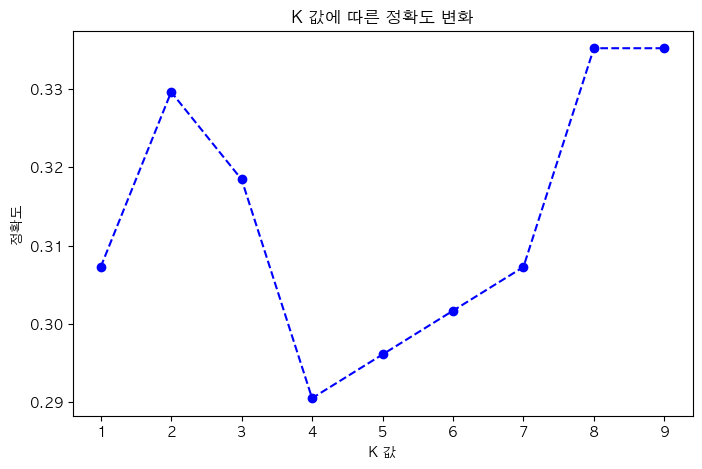

In [56]:
import matplotlib.font_manager as fm
plt.rc('font', family='AppleGothic')

# 9️⃣ K 값에 따른 정확도 변화 시각화
k_values = range(1, 10)
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_k = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# 그래프 출력
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("K 값")
plt.ylabel("정확도")
plt.title("K 값에 따른 정확도 변화")
plt.xticks(k_values)
plt.show()